In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Ingest JSON
### Load, Explore, Convert to DataFrame

In [2]:
import json

In [3]:
f = open('cw_be_09172019.json')
data = json.load(f)

In [4]:
data.keys()

dict_keys(['header', 'result'])

In [5]:
data['header'].keys()

dict_keys(['subject_audience', 'analysis_type'])

In [6]:
data['header']['subject_audience']

'Consolidated Widgets'

In [7]:
data['header']['analysis_type']

'behavioral_evolution'

In [8]:
print(type(data['result']))
print(len(data['result']))

<class 'list'>
14273


In [9]:
data['result'][0]

{'month': 7,
 'year': 2018,
 'month_year': '07-2018',
 'a.attribute_interest_id': 32486,
 'average_composition': 11.89,
 'average_index': 6.19,
 'rank': 1,
 'percentile_rank': 99.86}

In [10]:
df = pd.DataFrame(data['result'])
df.head()

,month,year,month_year,a.attribute_interest_id,average_composition,average_index,rank,percentile_rank,attribute_interest_id
0,7.0,2018.0,07-2018,32486.0,11.89,6.19,1,99.86,NaN
1,7.0,2018.0,07-2018,6106.0,9.93,5.31,2,99.73,NaN
2,7.0,2018.0,07-2018,18923.0,10.85,5.29,3,99.59,NaN
3,7.0,2018.0,07-2018,6344.0,10.32,5.10,4,99.45,NaN
4,7.0,2018.0,07-2018,100.0,10.77,5.04,5,99.31,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14273 entries, 0 to 14272
Data columns (total 9 columns):
month                      13079 non-null float64
year                       13079 non-null float64
month_year                 13079 non-null object
a.attribute_interest_id    13080 non-null float64
average_composition        14273 non-null float64
average_index              14273 non-null float64
rank                       14273 non-null int64
percentile_rank            14273 non-null float64
attribute_interest_id      1193 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1003.7+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
month,13079.0,6.458063,3.318293,1.00,4.00,7.00,9.00,12.00
year,13079.0,2018.613426,0.486983,2018.00,2018.00,2019.00,2019.00,2019.00
a.attribute_interest_id,13080.0,17939.778746,15395.869264,1.00,5967.00,12027.00,34471.00,51678.00
average_composition,14273.0,3.337601,1.705520,1.51,2.22,2.86,3.87,21.20
average_index,14273.0,1.535147,0.503711,0.44,1.19,1.45,1.78,6.19
rank,14273.0,484.332376,294.026260,1.00,236.00,470.00,709.00,1194.00
percentile_rank,14273.0,50.340397,28.808780,0.00,25.53,50.46,75.26,99.92
attribute_interest_id,1193.0,21669.761945,16710.656955,1.00,6123.00,19588.00,39332.00,51678.00


## Ingest CSV

In [13]:
nice_name = pd.read_csv('interest_id_name_map.csv')
nice_name.head()

,ID,INTEREST_NAME,INTEREST_SUMMARY,CREATED_AT,LAST_MODIFIED,Unnamed: 5
0,1,Fitness Enthusiasts,Consumers using fitness tracking apps and webs...,5/26/2016 14:57,5/23/2018 11:30,NaN
1,2,Gamers,Consumers researching game reviews and cheat c...,5/26/2016 14:57,5/23/2018 11:30,NaN
2,3,Car Enthusiasts,Readers of automotive news and car reviews.,5/26/2016 14:57,5/23/2018 11:30,NaN
3,4,Luxury Retail Researchers,Consumers researching luxury product reviews a...,5/26/2016 14:57,5/23/2018 11:30,NaN
4,5,Brides & Wedding Planners,People researching wedding ideas and vendors.,5/26/2016 14:57,5/23/2018 11:30,NaN


In [14]:
nice_name.tail()

,ID,INTEREST_NAME,INTEREST_SUMMARY,CREATED_AT,LAST_MODIFIED,Unnamed: 5
1203,49979,Cape Cod News Readers,People interested in reading about local news ...,4/15/2019 18:00,4/18/2019 9:00,NaN
1204,50860,Food Delivery Service Users,Users of online food delivery services.,4/23/2019 18:00,4/24/2019 18:30,NaN
1205,51119,Skin Disorder Researchers,People reading news and advice on preventing a...,4/26/2019 18:00,4/29/2019 14:20,NaN
1206,51120,Foot Health Researchers,People reading news and advice on preventing a...,4/26/2019 18:00,4/29/2019 14:20,NaN
1207,51678,Plumbers,Professionals reading industry news and resear...,5/6/2019 22:00,5/7/2019 18:50,NaN


In [15]:
nice_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 6 columns):
ID                  1208 non-null int64
INTEREST_NAME       1208 non-null object
INTEREST_SUMMARY    1188 non-null object
CREATED_AT          1208 non-null object
LAST_MODIFIED       1208 non-null object
Unnamed: 5          0 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 56.8+ KB


## Join DataFrames
### Preliminary Cleaning

In [16]:
nice_name.columns = [name.lower() for name in nice_name.columns]

In [17]:
# convert to same dtype and join on attribute id using left join because we only care about rows in data file
print(df['a.attribute_interest_id'].dtype)
print(nice_name.id.dtype)

float64
int64


In [18]:
# ID in df is broken up into two columns, merge them
df['a.attribute_interest_id'].fillna(0, inplace=True)
df['attribute_interest_id'].fillna(0, inplace=True)

In [19]:
df['fixed_attribute_id'] = (df['a.attribute_interest_id'] + df['attribute_interest_id']).astype('int')

In [20]:
# no duplicate rows
df.duplicated().value_counts()

False    14273
dtype: int64

In [21]:
# some attribute have only one record, but will circle back to this later
df.fixed_attribute_id.value_counts()

22095    15
14901    15
6393     15
20768    15
18923    15
         ..
33534     1
42010     1
19598     1
47789     1
35964     1
Name: fixed_attribute_id, Length: 1209, dtype: int64

In [22]:
new_df = pd.merge(df, nice_name, how='left', left_on='fixed_attribute_id', right_on='id', validate='many_to_one')
new_df.head()

,month,year,month_year,a.attribute_interest_id,average_composition,average_index,rank,percentile_rank,attribute_interest_id,fixed_attribute_id,id,interest_name,interest_summary,created_at,last_modified,unnamed: 5
0,7.0,2018.0,07-2018,32486.0,11.89,6.19,1,99.86,0.0,32486,32486.0,Vacation Rental Accommodation Researchers,People researching and booking rentals accommo...,6/29/2018 12:55,6/29/2018 12:55,NaN
1,7.0,2018.0,07-2018,6106.0,9.93,5.31,2,99.73,0.0,6106,6106.0,Luxury Second Home Owners,High income individuals with more than one home.,3/27/2017 16:59,5/23/2018 11:30,NaN
2,7.0,2018.0,07-2018,18923.0,10.85,5.29,3,99.59,0.0,18923,18923.0,Online Home Decor Shoppers,Consumers shopping online for home decor avail...,4/19/2018 18:25,4/19/2018 18:25,NaN
3,7.0,2018.0,07-2018,6344.0,10.32,5.10,4,99.45,0.0,6344,6344.0,Hair Care Shoppers,Consumers researching trends and purchasing ha...,5/15/2017 13:04,5/31/2018 22:11,NaN
4,7.0,2018.0,07-2018,100.0,10.77,5.04,5,99.31,0.0,100,100.0,Nutrition Conscious Eaters,Consumer reading about healthy eating options.,5/26/2016 14:57,5/23/2018 11:30,NaN


## Data Cleaning
### Fix DateTime

In [23]:
new_df.insert(2,'date',pd.to_datetime(new_df.month_year))

In [24]:
new_df.drop(columns=['month_year'], inplace=True)

In [25]:
new_df.head()

,month,year,date,a.attribute_interest_id,average_composition,average_index,rank,percentile_rank,attribute_interest_id,fixed_attribute_id,id,interest_name,interest_summary,created_at,last_modified,unnamed: 5
0,7.0,2018.0,2018-07-01,32486.0,11.89,6.19,1,99.86,0.0,32486,32486.0,Vacation Rental Accommodation Researchers,People researching and booking rentals accommo...,6/29/2018 12:55,6/29/2018 12:55,NaN
1,7.0,2018.0,2018-07-01,6106.0,9.93,5.31,2,99.73,0.0,6106,6106.0,Luxury Second Home Owners,High income individuals with more than one home.,3/27/2017 16:59,5/23/2018 11:30,NaN
2,7.0,2018.0,2018-07-01,18923.0,10.85,5.29,3,99.59,0.0,18923,18923.0,Online Home Decor Shoppers,Consumers shopping online for home decor avail...,4/19/2018 18:25,4/19/2018 18:25,NaN
3,7.0,2018.0,2018-07-01,6344.0,10.32,5.10,4,99.45,0.0,6344,6344.0,Hair Care Shoppers,Consumers researching trends and purchasing ha...,5/15/2017 13:04,5/31/2018 22:11,NaN
4,7.0,2018.0,2018-07-01,100.0,10.77,5.04,5,99.31,0.0,100,100.0,Nutrition Conscious Eaters,Consumer reading about healthy eating options.,5/26/2016 14:57,5/23/2018 11:30,NaN


### General Cleaning

In [26]:
# drop unnecessary/redundant columns
new_df.drop(columns=['a.attribute_interest_id','attribute_interest_id','id','unnamed: 5'], inplace=True)

In [27]:
# inspect data where id is repeated multiple times (taking attribute id 22095 from df value_counts)
# time series is 14 months
new_df[new_df['fixed_attribute_id'] == 22095]

,month,year,date,average_composition,average_index,rank,percentile_rank,fixed_attribute_id,interest_name,interest_summary,created_at,last_modified
407,7.0,2018.0,2018-07-01,4.54,1.64,408,44.03,22095,Hiking Enthusiasts,"People researching hiking trails, planning hik...",6/18/2018 18:40,6/18/2018 18:40
900,8.0,2018.0,2018-08-01,3.84,1.54,169,77.97,22095,Hiking Enthusiasts,"People researching hiking trails, planning hik...",6/18/2018 18:40,6/18/2018 18:40
1784,9.0,2018.0,2018-09-01,2.92,1.34,286,63.33,22095,Hiking Enthusiasts,"People researching hiking trails, planning hik...",6/18/2018 18:40,6/18/2018 18:40
2547,10.0,2018.0,2018-10-01,3.27,1.56,269,68.61,22095,Hiking Enthusiasts,"People researching hiking trails, planning hik...",6/18/2018 18:40,6/18/2018 18:40
3415,11.0,2018.0,2018-11-01,2.93,1.56,283,69.50,22095,Hiking Enthusiasts,"People researching hiking trails, planning hik...",6/18/2018 18:40,6/18/2018 18:40
4348,12.0,2018.0,2018-12-01,3.06,1.61,281,71.76,22095,Hiking Enthusiasts,"People researching hiking trails, planning hik...",6/18/2018 18:40,6/18/2018 18:40
5868,1.0,2019.0,2019-01-01,1.91,1.02,801,17.68,22095,Hiking Enthusiasts,"People researching hiking trails, planning hik...",6/18/2018 18:40,6/18/2018 18:40
6743,2.0,2019.0,2019-02-01,2.95,1.17,703,37.29,22095,Hiking Enthusiasts,"People researching hiking trails, planning hik...",6/18/2018 18:40,6/18/2018 18:40
7783,3.0,2019.0,2019-03-01,2.74,1.23,629,44.63,22095,Hiking Enthusiasts,"People researching hiking trails, planning hik...",6/18/2018 18:40,6/18/2018 18:40
8733,4.0,2019.0,2019-04-01,2.38,1.33,443,59.69,22095,Hiking Enthusiasts,"People researching hiking trails, planning hik...",6/18/2018 18:40,6/18/2018 18:40


In [28]:
# we have +1yr of data for over half the ids and at least 9 months for 75%
new_df.fixed_attribute_id.value_counts().describe()

count    1209.000000
mean       11.805624
std         3.544808
min         1.000000
25%         9.000000
50%        13.000000
75%        15.000000
max        15.000000
Name: fixed_attribute_id, dtype: float64

In [29]:
'''no useful information other than to take a look at relationship between average composition and average index'''
# sns.pairplot(new_df) 

'no useful information other than to take a look at relationship between average composition and average index'

## Evergreen Behaviors
### Behavioral attributes that consistently rank high over time
Given this definition, I will limit the trend_df to the following:<br>
1) attributes with a trend history of 9 months or greater. Assumption is less than 9 of 14 months of data points is insufficient to denote a trend<br>2) attributes that are consistently in the right tail (95th percentile or higher) of the rankings. These are outliers and almost certainly signal (not noise).<br>3) drop rows with null values in date column as there's no context for trend analysis 

In [30]:
# create dataframe to focus on percentile rank
trend_df = new_df[['date','percentile_rank','fixed_attribute_id','interest_name']]
trend_df.head()

,date,percentile_rank,fixed_attribute_id,interest_name
0,2018-07-01,99.86,32486,Vacation Rental Accommodation Researchers
1,2018-07-01,99.73,6106,Luxury Second Home Owners
2,2018-07-01,99.59,18923,Online Home Decor Shoppers
3,2018-07-01,99.45,6344,Hair Care Shoppers
4,2018-07-01,99.31,100,Nutrition Conscious Eaters


In [31]:
# select >= 95th percentile and drop rows with no date values
high_rank = trend_df[trend_df['percentile_rank'] >= 95]
high_rank = high_rank.dropna(subset=['date'])

In [32]:
# pivot dataframe to show attributes as columns over time
high_rank = high_rank.pivot('date','interest_name','percentile_rank')
high_rank

interest_name,Affordable Hotel Bookers,Apartment Furniture Shoppers,Aspen Skiers and Snowboarders,At-Home Gym Intenders,Ballet Enthusiasts,Beach Supplies Shoppers,Big & Tall Men,Big East Fans,Boston Red Sox Fans,Canoeing and Kayaking Enthusiasts,...,Weight Loss Researchers,Western Canada Skiers and Snowboarders,Wine Lovers,Winter Apparel Shoppers,Womens Fashion Brands Shoppers,Work Comes First Travelers,"Work Hard, Play Hard Travelers",World Cup Apparel Shoppers,World Cup Enthusiasts,Yale University Fans
date,,,,,,,,,,,,,,,,,,,,,
2018-07-01,NaN,98.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98.22,NaN,98.9,NaN,95.34,NaN,NaN,NaN,NaN,NaN
2018-08-01,NaN,97.26,NaN,96.87,NaN,95.44,96.35,NaN,95.31,NaN,...,NaN,NaN,NaN,NaN,95.70,96.35,NaN,98.31,97.78,NaN
2018-09-01,NaN,98.33,NaN,98.08,NaN,NaN,97.05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,97.56,95.77,98.08,98.21,NaN
2018-10-01,NaN,98.13,NaN,98.60,NaN,95.22,97.20,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,95.57,95.92,95.45,97.43,97.90,NaN
2018-11-01,95.80,98.06,98.49,98.71,NaN,95.80,98.92,NaN,NaN,96.98,...,NaN,96.98,NaN,NaN,95.37,96.55,96.66,NaN,97.20,NaN
2018-12-01,NaN,98.29,97.99,97.89,NaN,96.28,95.88,95.38,NaN,NaN,...,NaN,97.69,NaN,99.90,98.59,97.89,97.49,NaN,97.49,NaN
2019-01-01,NaN,98.77,98.25,98.25,NaN,98.36,97.23,NaN,NaN,NaN,...,NaN,NaN,NaN,99.90,98.77,98.97,98.46,95.07,98.77,NaN
2019-02-01,NaN,97.06,97.77,96.34,NaN,99.11,97.06,NaN,NaN,NaN,...,NaN,96.16,NaN,99.91,95.09,98.93,97.86,NaN,99.38,NaN
2019-03-01,NaN,96.65,99.03,97.45,NaN,98.15,98.77,95.51,NaN,NaN,...,NaN,95.25,NaN,99.91,NaN,NaN,NaN,NaN,98.42,NaN


In [33]:
def null_filter(df, limit):
    '''takes a dataframe (df) and a max acceptable null count (limit) and returns 
    a filtered list of dataframe column names ordered by least nulls'''
    df_cols = []
    # get array of null counts for each column, sort ascending (cols with least nulls to cols with most) 
    values = df.isna().sum().sort_values().values
    # get array of corresponding col names
    col_names = df.isna().sum().sort_values().index
    
    for index, value in enumerate(values):
        if value <= limit:
            df_cols.append(col_names[index])
    return df_cols

In [34]:
# mask to filter the dataframe down to only the evergreen attributes, 
# those with 95th percentile or greater for at least 9 of 14 months

evergreen = null_filter(high_rank, 5)
print(evergreen)
print(f'length: {len(evergreen)}')

['Golf Enthusiasts', 'Luxury Retail Researchers', 'Shoe Shoppers', 'Sporting Goods Shoppers', 'Competitive Tri-Athletes', 'Preppy Clothing Shoppers', 'Lacrosse Enthusiasts', 'World Cup Enthusiasts', 'Luxury Boutique Hotel Researchers', 'Big & Tall Men', 'At-Home Gym Intenders', "Men's Shoe Shoppers", 'Luxury Home Fixture Shoppers', 'Beach Supplies Shoppers', 'Competitive Sports Participants', 'Apartment Furniture Shoppers', 'Vacation Planners', 'Vacation Rental Accommodation Researchers', 'Luxury Kitchen Goods Shoppers', 'Running Enthusiasts', 'Luggage Shoppers', 'Olympics Fans', 'Utility Workwear Shoppers', 'Luxury Hotel Guests', 'Vermont Trip Planners', 'Ski and Snowboard Apparel Shoppers', 'Home Decor Shoppers', 'Colorado Skiers and Snowboarders', 'Aspen Skiers and Snowboarders', 'Kids Clothing Shoppers', 'Swimming Enthusiasts', 'Gym Equipment Owners', 'Fitness Activity Tracker Users', 'Reusable Drinkware Shoppers', 'Winter Apparel Shoppers']
length: 35


In [35]:
evergreen_df = high_rank[evergreen]
evergreen_df

interest_name,Golf Enthusiasts,Luxury Retail Researchers,Shoe Shoppers,Sporting Goods Shoppers,Competitive Tri-Athletes,Preppy Clothing Shoppers,Lacrosse Enthusiasts,World Cup Enthusiasts,Luxury Boutique Hotel Researchers,Big & Tall Men,...,Ski and Snowboard Apparel Shoppers,Home Decor Shoppers,Colorado Skiers and Snowboarders,Aspen Skiers and Snowboarders,Kids Clothing Shoppers,Swimming Enthusiasts,Gym Equipment Owners,Fitness Activity Tracker Users,Reusable Drinkware Shoppers,Winter Apparel Shoppers
date,,,,,,,,,,,,,,,,,,,,,
2018-07-01,95.20,98.08,97.67,95.47,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.02,NaN
2018-08-01,97.91,99.22,99.09,98.57,99.74,99.35,98.96,97.78,97.52,96.35,...,NaN,NaN,NaN,NaN,NaN,NaN,95.31,NaN,NaN,NaN
2018-09-01,96.79,99.10,98.97,98.85,99.74,99.23,99.62,98.21,96.28,97.05,...,NaN,96.03,NaN,NaN,96.41,NaN,95.38,NaN,NaN,NaN
2018-10-01,98.25,98.95,99.42,98.83,99.77,99.07,99.30,97.90,97.08,97.20,...,NaN,96.03,NaN,NaN,96.15,NaN,96.85,NaN,95.22,NaN
2018-11-01,97.63,99.14,99.57,99.35,99.89,98.71,97.52,97.20,95.91,98.92,...,99.03,96.55,97.74,98.49,96.34,NaN,97.31,NaN,96.34,NaN
2018-12-01,95.38,99.50,99.20,98.79,99.70,98.99,98.29,97.49,96.78,95.88,...,98.69,96.18,98.09,97.99,97.19,99.30,95.38,99.80,96.58,99.90
2019-01-01,95.89,99.59,99.18,95.27,99.49,99.38,96.61,98.77,97.94,97.23,...,97.33,96.81,96.61,98.25,98.05,96.92,95.07,99.69,96.40,99.90
2019-02-01,97.41,99.73,99.64,98.31,98.93,99.46,97.41,99.38,98.57,97.06,...,97.68,95.45,99.02,97.77,95.99,98.22,NaN,99.20,98.39,99.91
2019-03-01,97.71,98.59,99.38,99.47,98.42,99.56,99.74,98.42,97.98,98.77,...,98.86,95.42,99.30,99.03,97.98,98.94,96.04,99.65,97.71,99.91


In [36]:
evergreen_df.describe()

interest_name,Golf Enthusiasts,Luxury Retail Researchers,Shoe Shoppers,Sporting Goods Shoppers,Competitive Tri-Athletes,Preppy Clothing Shoppers,Lacrosse Enthusiasts,World Cup Enthusiasts,Luxury Boutique Hotel Researchers,Big & Tall Men,...,Ski and Snowboard Apparel Shoppers,Home Decor Shoppers,Colorado Skiers and Snowboarders,Aspen Skiers and Snowboarders,Kids Clothing Shoppers,Swimming Enthusiasts,Gym Equipment Owners,Fitness Activity Tracker Users,Reusable Drinkware Shoppers,Winter Apparel Shoppers
count,14.000000,14.000000,14.000000,14.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,97.011429,98.680714,98.942143,97.989286,99.263077,99.191538,98.914615,98.317692,97.617692,97.890769,...,98.070000,96.138000,97.194000,98.060000,96.933000,98.693333,95.894444,99.596667,96.583333,99.897778
std,0.964284,0.916729,0.784819,1.359012,0.516113,0.353102,1.089469,0.636215,1.012597,1.168442,...,0.708865,0.739351,1.334351,0.886905,0.770744,0.779551,0.749818,0.167033,0.976588,0.013944
min,95.200000,96.500000,96.840000,95.270000,98.420000,98.370000,96.610000,97.200000,95.910000,95.880000,...,96.850000,95.020000,95.390000,96.180000,95.990000,96.920000,95.070000,99.200000,95.220000,99.880000
25%,96.400000,98.207500,99.000000,97.290000,98.950000,99.000000,98.290000,97.900000,97.080000,97.060000,...,97.682500,95.595000,96.197500,97.802500,96.350000,98.370000,95.380000,99.550000,96.020000,99.880000
50%,97.310000,99.025000,99.190000,98.590000,99.450000,99.350000,99.620000,98.380000,97.520000,97.820000,...,98.060000,96.105000,96.965000,98.025000,96.800000,98.910000,95.800000,99.650000,96.400000,99.900000
75%,97.690000,99.200000,99.410000,98.820000,99.740000,99.420000,99.650000,98.720000,98.300000,98.920000,...,98.630000,96.497500,98.002500,98.430000,97.480000,99.190000,96.040000,99.650000,96.870000,99.910000
max,98.250000,99.730000,99.640000,99.470000,99.890000,99.560000,99.760000,99.380000,99.390000,99.420000,...,99.030000,97.550000,99.300000,99.450000,98.050000,99.480000,97.310000,99.800000,98.390000,99.910000


In [37]:
# arrays for charts
evergreen_index = evergreen_df.describe().loc['mean'].index
evergreen_mean = evergreen_df.describe().loc['mean'].values
evergreen_max = evergreen_df.describe().loc['max'].values
evergreen_min = evergreen_df.describe().loc['min'].values
evergreen_std = evergreen_df.describe().loc['std'].values

{4: 'Competitive Tri-Athletes',
 5: 'Preppy Clothing Shoppers',
 11: "Men's Shoe Shoppers",
 32: 'Fitness Activity Tracker Users',
 34: 'Winter Apparel Shoppers'}

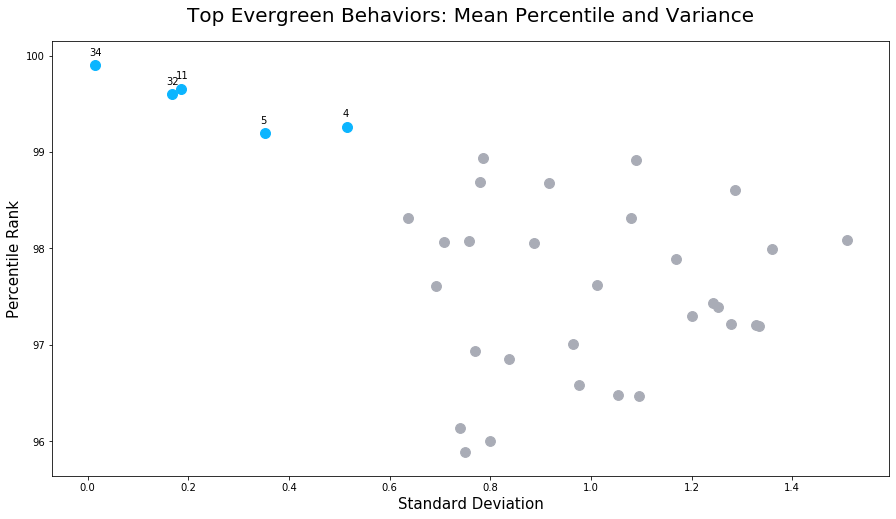

In [38]:
# create scatterplot
legend={}
_=plt.figure(figsize=(15,8))
_=plt.ylabel('Percentile Rank', fontsize=15)
_=plt.xlabel('Standard Deviation', fontsize=15)
_=plt.title('Top Evergreen Behaviors: Mean Percentile and Variance', fontsize=20, y=1.03)
for index, label in enumerate(evergreen_index):
    if evergreen_std[index] < 0.6 and evergreen_mean[index] > 99:
        _=plt.scatter(evergreen_std[index], evergreen_mean[index], label=index, s=evergreen_mean[index], c='#0BB5FF')
        _=plt.annotate(index,(evergreen_std[index], evergreen_mean[index]), xytext=(-5,10), textcoords='offset points')
        legend[index] = label
    else:
        _=plt.scatter(evergreen_std[index], evergreen_mean[index], label=index, s=evergreen_mean[index], c='#A9ACB6')
legend

[Text(0.5, 0, '')]

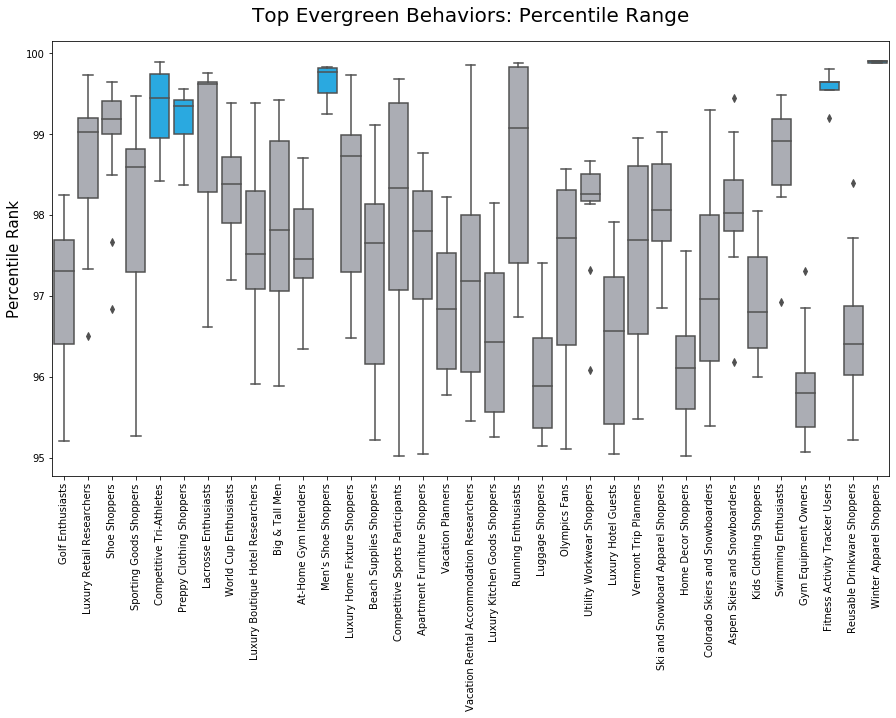

In [39]:
# create boxplot
pal = {cat: "#0BB5FF" if cat in ['Competitive Tri-Athletes','Preppy Clothing Shoppers',"Men's Shoe Shoppers",
                                 'Fitness Activity Tracker Users','Winter Apparel Shoppers'] 
        else "#A9ACB6" for cat in evergreen_df.columns.unique()}
_= plt.figure(figsize=(15,8))
_=plt.ylabel('Percentile Rank', fontsize=15)
_=plt.title('Top Evergreen Behaviors: Percentile Range', fontsize=20, y=1.03)
_= sns.boxplot(data=evergreen_df, palette=pal)
_.set_xticklabels(_.get_xticklabels(), rotation=90)
_.set(xlabel=None)


### Discussion
There are clear patterns among the top evergreen behaviors:<br> 1) They center around an active demographic <br> 2) potentially slant toward men given the men's shoes overlap <br> 3) preppy clothing and active lifestyle point to young professionals <br> 4) not surprising, but worth noting, the clear downward slope as volatility increases <br> 5) fitness activity tracker users and winter apparel shoppers are the most consistent, lowest vol behavior set for Consolidated Widget Co

## Interesting Changes in Behavior
### Behavioral attributes that show fluctuations in rank over time
Given this definition, I will limit the fluctuations_df to the following:<br>
1) attributes with a trend history of 9 months or greater. Assumption is less than 9 of 14 months of data points is insufficient to denote a trend<br>2) attributes that are in the right tail (95th percentile or higher) of volatility.<br>3) drop rows with null values in date column for uniformity with trend_df

In [40]:
# drop rows with no date values
trend_df_copy = trend_df.dropna(subset=['date'])
trend_df_copy.head()

,date,percentile_rank,fixed_attribute_id,interest_name
0,2018-07-01,99.86,32486,Vacation Rental Accommodation Researchers
1,2018-07-01,99.73,6106,Luxury Second Home Owners
2,2018-07-01,99.59,18923,Online Home Decor Shoppers
3,2018-07-01,99.45,6344,Hair Care Shoppers
4,2018-07-01,99.31,100,Nutrition Conscious Eaters


In [41]:
# create flucations table and sort by std
fluctuations_df = trend_df_copy.groupby('interest_name')['percentile_rank'].agg(['mean','max','min','std','count']).sort_values('std',ascending=False)
fluctuations_df.head()

,mean,max,min,std,count
interest_name,,,,,
Blockbuster Movie Fans,31.445000,60.63,2.26,41.273823,2
Android Fans,20.254000,75.03,4.84,30.720768,5
TV Junkies,45.638000,93.28,10.01,30.363975,5
Techies,28.083333,86.69,7.92,30.175047,6
Entertainment Industry Decision Makers,27.623333,86.15,11.23,28.974920,6


In [42]:
# drop behaviors with less than 9 observations
fluctuations_df = fluctuations_df[fluctuations_df['count'] >= 9]

In [43]:
# percentile ranking for standard deviation
fluctuations_df['pct_rank'] = fluctuations_df['std'].rank(pct=True)

In [44]:
fluctuations_df['pct_rank'] = round(fluctuations_df['pct_rank'] * 100,2)

In [45]:
# select top ranked for standard deviation
fluctuations_df = fluctuations_df[fluctuations_df['pct_rank'] >= 95]
fluctuations_df.head()

,mean,max,min,std,count,pct_rank
interest_name,,,,,,
Oregon Trip Planners,39.732000,82.44,2.20,28.318456,10,100.00
Live Concert Fans,55.455833,95.61,18.75,24.494235,12,99.89
Pregnancy Resources Researchers,16.573636,88.34,1.29,24.070075,11,99.78
Metal and Rock Music Fans,10.670000,81.89,0.35,23.922359,11,99.67
Women's Fashion Magazine Readers,33.847000,93.42,7.92,23.740717,10,99.56


In [46]:
# create arrays for charts
fluctuations_index = fluctuations_df['mean'].index
fluctuations_mean = fluctuations_df['mean'].values
fluctuations_max = fluctuations_df['max'].values
fluctuations_min = fluctuations_df['min'].values
fluctuations_std = fluctuations_df['std'].values
fluctuations_pct_rank = fluctuations_df['pct_rank'].values

{0: 'Oregon Trip Planners',
 1: 'Live Concert Fans',
 2: 'Pregnancy Resources Researchers',
 3: 'Metal and Rock Music Fans',
 4: "Women's Fashion Magazine Readers",
 5: 'Santa Cruz Trip Planners',
 6: 'Denver Nuggets Fans',
 7: 'Baby Products Buyers'}

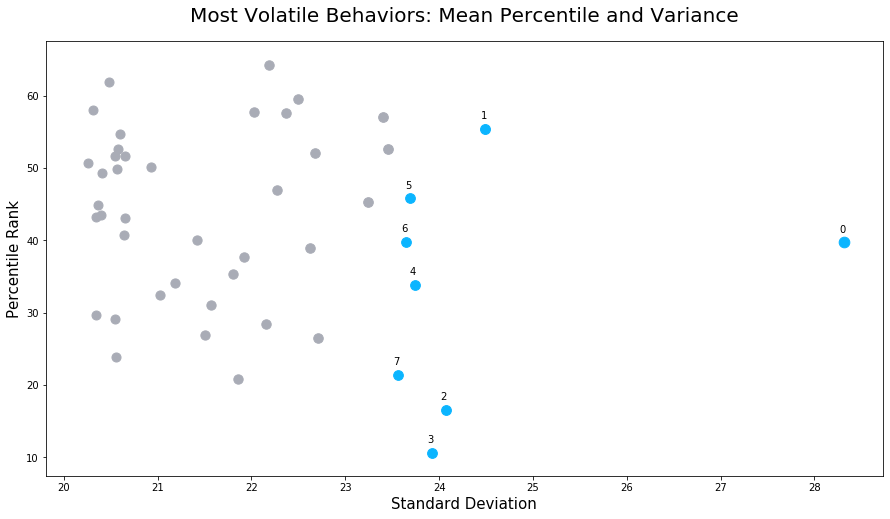

In [47]:
# create scatter plot
legend={}
_=plt.figure(figsize=(15,8))
_=plt.ylabel('Percentile Rank', fontsize=15)
_=plt.xlabel('Standard Deviation', fontsize=15)
_=plt.title('Most Volatile Behaviors: Mean Percentile and Variance', fontsize=20, y=1.03)
for index, label in enumerate(fluctuations_index):
    if fluctuations_std[index] > 23.5:
        _=plt.scatter(fluctuations_std[index], fluctuations_mean[index], label=index, s=fluctuations_std[index]*4, c='#0BB5FF')
        _=plt.annotate(index,(fluctuations_std[index], fluctuations_mean[index]), xytext=(-5,10), textcoords='offset points')
        legend[index] = label
    else:
        _=plt.scatter(fluctuations_std[index], fluctuations_mean[index], label=index, s=fluctuations_std[index]*4, c='#A9ACB6')
legend

### Discussion
There's little contiguity among the highest volatility behaviors. Moreover there are at least three differentiated and seemingly unrelated categories:<br> 1) Location/Destination specific behaviors (Oregon, Denver, Santa Cruz)<br> 2) Women focused behaviors (pregnancy, women's fashion, and baby products which is unisex but likely heavier female)<br> 3) and Music/Event focused behaviors (live music, Metal and Rock fans)

One common thread might be seasonality. These are all seasonal and/or punctuated by long periods between events for any particular individual. This may partially explain the high volatility

## Relationship Between Avg Composition and Avg Index

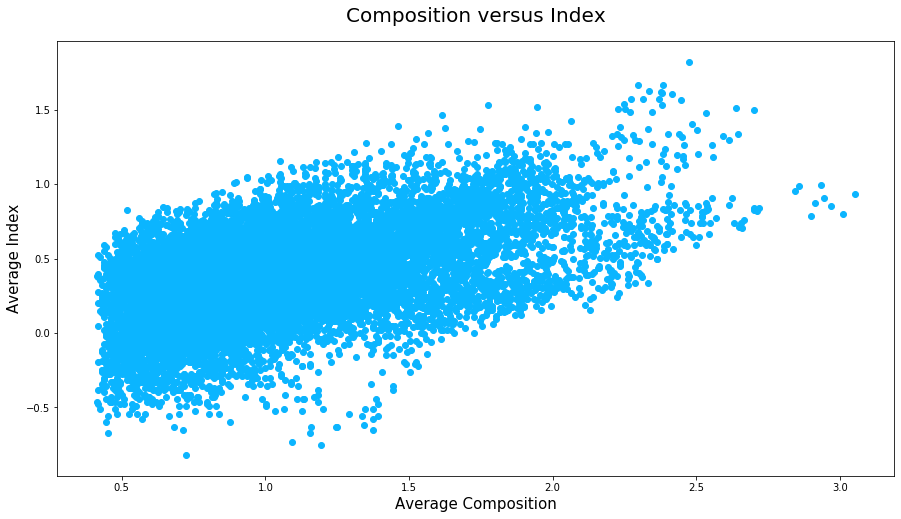

In [48]:
# create scatter plot to show correlation
_=plt.figure(figsize=(15,8))
_=plt.ylabel('Average Index', fontsize=15)
_=plt.xlabel('Average Composition', fontsize=15)
_=plt.title('Composition versus Index', fontsize=20, y=1.03)
_=plt.scatter(np.log(new_df['average_composition']), np.log(new_df['average_index']), c='#0BB5FF')

In [49]:
# log composition and log index have a +0.53 correlation coefficient indicating a moderate positive linear relationship
np.corrcoef(np.log(new_df['average_composition']), np.log(new_df['average_index']))

array([[1.        , 0.53449455],
       [0.53449455, 1.        ]])

### Discussion
I used log scale to spread out the data and to coerce a more linear relationship. There's a clear trend up and to the right. As log average composition increases, log average index tends to increase.<br> 
<br>From exploring the JSON, my understanding is that the subject audience is only Consolidated Widgets. Therefore, the average composition represents the percent average overlap between Consolidated Widgets audience and the respective attribute audiences. It follows that Average Index indicates how many times more likely Consolidated Widgets audience is to be a member of the respective attribute audience than the national average. This is a straight forward insight - as overlap between Consolidated Widgets' audience and the attribute audience increases, the probability that Consolidated Widgets' audience belongs to the attribute group increases vis-a-vis the national average.

## Areas for further exploration
Given more time, I would explore the following:
- how average composition changes over time to see where there are trends of increasing/decreasing overlap.
- whether there are any attributes that moved from the bottom quartile to the top quartile over time and vice versa.
- exand the range of allows null values to scout promising behaviors that don't yet meet the threshhold of a trend (based on the criteria of having 9+ months of data).